## Prediction Using Unsupervised Machine Learning
### Problem Statement :
###### For the iris dataset,predict the optimum number of clusters and represent it visually. 

 #### By - Akshay Kachave

Methods :
    1) KMeans Clustering
    2) Hierarchical Clustering

#### Importing the necessary packages

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

### Loading  the iris data set

In [3]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop("Id",axis = 1 , inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualization of the data

<Figure size 288x288 with 0 Axes>

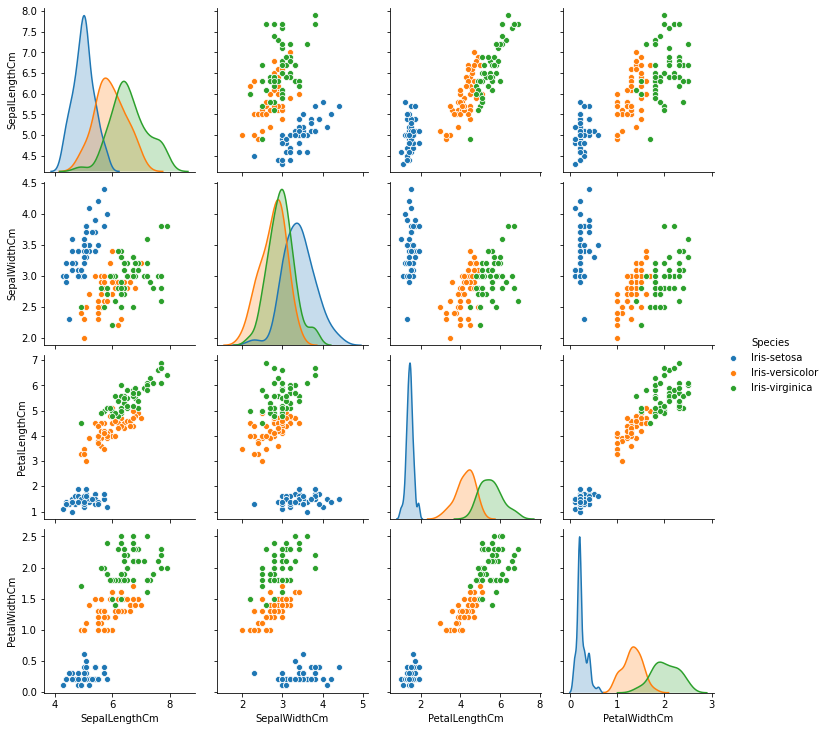

In [5]:
plt.figure(figsize = (4, 4))
sns.color_palette('rainbow')
sns.pairplot(data, hue = 'Species')
plt.show()

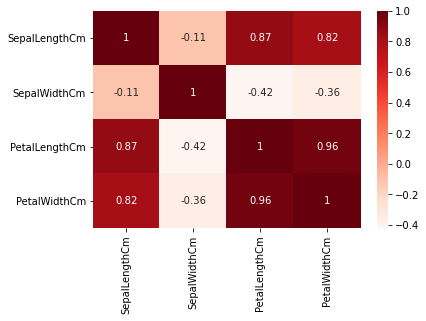

In [6]:
sns.heatmap(data.corr(), cmap = 'Reds', annot = True)
plt.show()

## Predicting the optimum number of Clusters :
### 1) KMeans Clustering

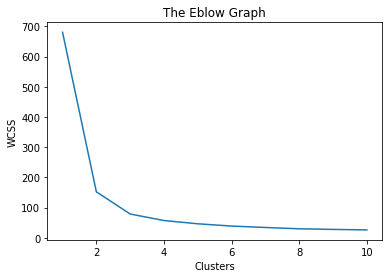

In [7]:
X = data.iloc[:,0:4].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
wcss

plt.plot([i for i in range(1, 11)], wcss)
plt.title('The Eblow Graph')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

From the above Scree Plot we can see that there is massive drop of the value WCSS from 2 to 4 and these is form the elbow of the plot, after point 3 there is slight straight line thus we can conclude that 3 clusters would be optimun for our algorithm

### Training the model with Optimum Clusters :

In [8]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 43, 
                init = 'k-means++', n_init = 10)
pred = kmeans.fit_predict(X)

data['Categories'] = pred

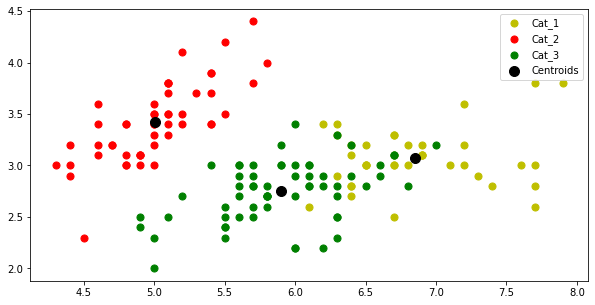

In [9]:
d_0 = data[data['Categories'] == 0]
d_1 = data[data['Categories'] == 1]
d_2 = data[data['Categories'] == 2]

plt.figure(figsize=(10,5))

plt.scatter(d_0.iloc[:, 0], d_0.iloc[:, 1] , color = 'y', label = 'Cat_1', s= 50)

plt.scatter(d_1.iloc[:, 0], d_1.iloc[:, 1] , color = 'r', label = 'Cat_2', s= 50)

plt.scatter(d_2.iloc[:, 0], d_2.iloc[:, 1] , color = 'g', label = 'Cat_3', s= 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', label = 'Centroids', s = 100)

plt.legend()

### 2) Hierarchical Clustering
In hierarchical clustering, these new step also consist of finding the optimal number of cluster. Only this time we are not going to use the scree plot or elbow method. We are going to use the dendogram.

#### Importing the necessary packages for hierarchical clustering.

In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

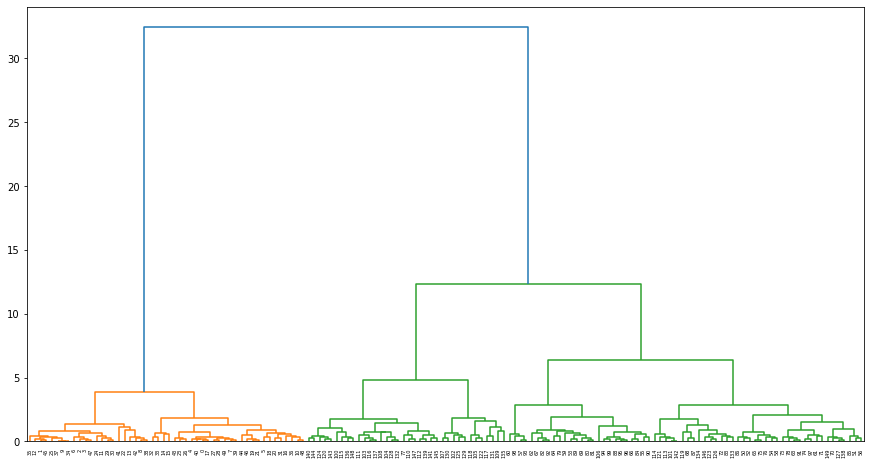

In [11]:
X = data.iloc[:, 0:4].values
P = sch.linkage(X, 'ward')
plt.figure(figsize = (15, 8))
dendrogram = sch.dendrogram(P)

Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants.
From the above dendogram we can see that the largest distance that we can vertically without crossing any horizontal line. lets count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 3 for this dataset.

### Training the Model with Optimum Clusters :

In [12]:
cluster = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
pred = cluster.fit_predict(X)
data['Categories'] = pred

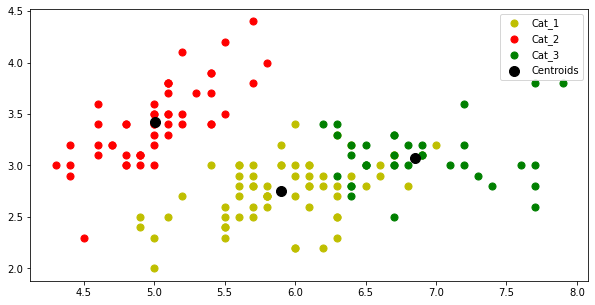

In [13]:
df_0 = data[data['Categories'] == 0]
df_1 = data[data['Categories'] == 1]
df_2 = data[data['Categories'] == 2]

plt.figure(figsize=(10,5))

plt.scatter(df_0.iloc[:, 0], df_0.iloc[:, 1] , color = 'y', label = 'Cat_1', s= 50)

plt.scatter(df_1.iloc[:, 0], df_1.iloc[:, 1] , color = 'r', label = 'Cat_2', s= 50)

plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 1] , color = 'g', label = 'Cat_3', s= 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', label = 'Centroids', s = 100)

plt.legend()

#### Conclusion:
As we can notice that both the results that we got using KMeans and Hierarchical clustering are very similar but we achieved better accuracy using Hierarchical Clustering , because in hierarchical Clustering of wards method minimize the within cluster variance.